# P4DS FINAL PROJECT

| Student ID | Full name       | Github                                               |
|:-----------|:----------------|:-----------------------------------------------------|
| 19127154   | Nguyễn Thế Hưng | [DieuBang](https://github.com/DieuBang)              |
| 19127183   | Dương Minh Khôi | [Wepewour19clc7](https://github.com/Wepewour19clc7)  |

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Collecting data

What subject is your data about? What is the source of your data?
- Data fetched from Kaggle, about Pokemon stats

Do authors of this data allow you to use like this? You can check the data license
- Data is available on the public domain

How did authors collect data?
- Author use PokeAPI. Other data sources include PokemonDB, Serebii, Bulbapedia, and Pokemon Wiki

# 2. Exploring data

In [2]:
df = pd.read_csv('pokemon.csv')
df

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


# 3. Asking meaningful questions

As big fans of pokemon series, we always want to know which pokemon is the strongest pokemon of all pokemons and  which element or type is the best among 18 pokemon types. There have been many debates, dicussions related to these two questions and it seems to be that there are no right anwsers. However, in this part, with the dataset we have, we will try and find out the answer for these questions.

# 4. Preprocess + analyzing data to answer questions

## 4.1 Preprocess data

Because ,in this part, we only compare pokemons by their power, weaknesses and strengths so we will drop out some irreleourant columns below:    
    pokedex_number  
    abilities  
    genus  
    female_rate  
    gen_introduced  
    genderless  
    baby_pokemon  
    forms_switchable  
    base_experience  
    capture_rate  
    egg_groups  
    egg_cycles  
    base_happiness  
    can_evolve  
    evolves_from  
    primary_color  
    shape  
    weight  
    height

In [3]:
data = df.drop(columns=['pokedex_number','abilities','genus','female_rate','gen_introduced','genderless','baby_pokemon','forms_switchable',\
                 'base_experience','capture_rate','egg_groups','egg_cycles','base_happiness',\
                 'can_evolve','evolves_from','primary_color','shape','height','weight'])
data

,name,typing,hp,attack,defense,special_attack,special_defense,speed,legendary,mythical,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,Grass~Poison,45,49,49,65,65,45,False,False,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,Grass~Poison,60,62,63,80,80,60,False,False,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,Grass~Poison,80,82,83,100,100,80,False,False,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,Grass~Poison,80,82,83,100,100,80,False,False,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,Grass~Poison,80,100,123,122,120,80,False,False,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,Ice,100,145,130,65,110,30,True,False,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,Ghost,100,65,60,145,80,130,True,False,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,Psychic~Grass,100,80,80,80,80,80,True,False,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,Psychic~Ice,100,165,150,85,130,50,True,False,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


Next, we will check for missing data from each columns. If missing data do exist, we will try to fix them. 

In [4]:
missing_values = np.zeros(32)
for index in range(len(data.keys())):
    missing_values[index] += data[data.keys()[index]].isnull().sum()
missing_values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Fortunately, there is no missing value from all 32 columns. Next thing we will do is to check if there is any duplication in pokemons.

In [5]:
duplicate = len(data['name'].unique())
duplicate

1118

The dataset have no duplication either. What a perfect dataset :))

## 4.2 Data analysis and visualization

In this part, we will analyze the dataset to try to find the answers for the questions that we have asked at the first part. Along this part, we may include some facts or real events that have happened in pokemon series, movies as evidences for our analysis.

### 4.2.1 Strongest pokemon

In this part, we will analyze the dataset to figure out if we can find the most overpowered pokemon of all.  
The strongest pokemon in our opinion must be the hardest pokemon to beat. All the statistic numbers of that pokemon must be elite and that pokemon must have the least weaknesses. Attributes like whether that pokemon is legendary, mythical or not, whether it can change to other forms (Gmax, Mega X, Mega Y,...) to make it stronger or not will also be considered as other factors that can be put into the valuation.

First, we will add two new columns: total_stats and total_effect. total_stats will be a total of a pokemon statistics which include HP, attack, defense, special attack, special defense, speed while total_effect will be total of elements' effectiveness on that pokemon.  
We expect a strong pokemon to have a high total_stats and a low total_effect ( low total_effect means that the pokemon will have a low chance of being hurt by other pokemon.

In [6]:
data['total_stats'] = data.iloc[:,2:8].sum(axis=1)
data['total_effect'] = data.iloc[:,12:30].sum(axis=1)
data.iloc[:,[0,30,31]]

,name,total_stats,total_effect
0,Bulbasaur,318,19.25
1,Ivysaur,405,19.25
2,Venusaur,525,19.25
3,Venusaur Gmax,525,19.25
4,Venusaur Mega,625,19.25
...,...,...,...
1113,Glastrier,580,21.50
1114,Spectrier,580,17.00
1115,Calyrex,500,24.00
1116,Calyrex Ice Rider,680,23.00


In [7]:
top_5_stats = data[data['is_default'] == True].sort_values(by = ['total_stats'],ascending = False).head()
top_5_stats.iloc[:,[0,30]]

,name,total_stats
615,Arceus,720
1103,Eternatus,690
866,Yveltal,680
488,Rayquaza,680
603,Dialga,680


The top 5 pokemons are Arceus, Eternatus, Yvettal, Rayquaza and Dialga. Let's see how many pokemon in this top 5 are Legendary or Mythical.

In [8]:
top_5_stats[['name','legendary','mythical']]

,name,legendary,mythical
615,Arceus,False,True
1103,Eternatus,True,False
866,Yveltal,True,False
488,Rayquaza,True,False
603,Dialga,True,False


All the pokemon are either legendary or mythical. Looks like they are legendary for a reason. The only mythical pokemon is Arceus and it actually the highest total_status pokemon.  
Next, we will find the top 5 lowest total_effect.

In [9]:
top_5_effect = data[data['is_default']== True].sort_values(by = ['total_effect']).head()
top_5_effect.iloc[:,[0,31]]

,name,total_effect
388,Mawile,13.25
850,Klefki,13.25
989,Magearna,13.25
1016,Corviknight,13.50
982,Celesteela,13.50


In [10]:
top_5_effect[['name','legendary','mythical']]

,name,legendary,mythical
388,Mawile,False,False
850,Klefki,False,False
989,Magearna,False,True
1016,Corviknight,False,False
982,Celesteela,False,False


Suprisingly, the top 5 total_effect pokemons are completely different from the top 5 total_stats pokemons. And there is only 1 pokemon which is mythical. This may be because of the type of the pokemon.

In [11]:
top_5_effect[['name','typing']]

,name,typing
388,Mawile,Steel~Fairy
850,Klefki,Steel~Fairy
989,Magearna,Steel~Fairy
1016,Corviknight,Flying~Steel
982,Celesteela,Steel~Flying


As we can see here, all the pokemon in top 5 all have type Steel. Steel type is one of the best defensive type but this will be discuss in the next part.
Because two list have different pokemons, we will merge two list for further comparison.

In [12]:
ten_pokemon = pd.concat([top_5_stats,top_5_effect])
ten_pokemon

,name,typing,hp,attack,defense,special_attack,special_defense,speed,legendary,mythical,...,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,total_stats,total_effect
615,Arceus,Normal,120,120,120,120,120,120,False,True,...,1.0,1.00,1.0,0.0,1.0,1.0,1.0,1.0,720,18.00
1103,Eternatus,Poison~Dragon,140,85,95,145,95,130,True,False,...,2.0,0.50,1.0,1.0,2.0,1.0,1.0,1.0,690,18.25
866,Yveltal,Dark~Flying,126,131,95,131,98,99,True,False,...,0.0,1.00,2.0,0.5,1.0,0.5,1.0,2.0,680,18.50
488,Rayquaza,Dragon~Flying,105,150,90,150,90,95,True,False,...,1.0,0.50,2.0,1.0,2.0,1.0,1.0,2.0,680,20.25
603,Dialga,Steel~Dragon,100,120,120,150,100,90,True,False,...,0.5,0.50,0.5,1.0,1.0,1.0,0.5,1.0,680,14.25
388,Mawile,Steel~Fairy,50,85,85,55,55,50,False,False,...,0.5,0.25,0.5,1.0,0.0,0.5,1.0,0.5,380,13.25
850,Klefki,Steel~Fairy,57,80,91,80,87,75,False,False,...,0.5,0.25,0.5,1.0,0.0,0.5,1.0,0.5,470,13.25
989,Magearna,Steel~Fairy,80,95,115,130,115,65,False,True,...,0.5,0.25,0.5,1.0,0.0,0.5,1.0,0.5,600,13.25
1016,Corviknight,Flying~Steel,98,87,105,53,85,67,False,False,...,0.5,0.25,1.0,1.0,0.5,1.0,0.5,0.5,495,13.50
982,Celesteela,Steel~Flying,97,101,103,107,101,61,False,False,...,0.5,0.25,1.0,1.0,0.5,1.0,0.5,0.5,570,13.50


In this stage, we will compare pokemon among each other through "battle" using the attributes we have in this datasets. Battling is a way to decide which pokemon is stronger in Pokemon world.

#### Battle
In this part, we will let 10 pokemons battle with each other.  
The rules are:  
_ Every pokemon will be at a same level.  
_ The pokemon damage will be base on their type.  
_ The pokemon with a higher speed will attack first every turns.  
_ Each time a pokemon attacks, they will deal damage equal to the equation below  
$$Damage = [0.5 . \frac{Attack}{Defense} . Type] + 1$$  
In this equation (some variables in the equation have been eliminated in order to fit the dataset well):     
_ Attack: (Special/Norm) attack of the pokemon attacking.  
_ Defense: (Special/Norm) defense of the pokemon being attacked.  
_ Type: The attack effectiveness of the attack pokemon's type affects the defense one.  


#### Battle setup
First, we will split the dataset of ten pokemons into two different table: one is for stats and the other is for attack effectiveness.

In [13]:
index = np.arange(10)
ten_pokemon.index = index
stats = ten_pokemon.iloc[:,1:8]
effect = ten_pokemon.iloc[:,12:30]
stats

,typing,hp,attack,defense,special_attack,special_defense,speed
0,Normal,120,120,120,120,120,120
1,Poison~Dragon,140,85,95,145,95,130
2,Dark~Flying,126,131,95,131,98,99
3,Dragon~Flying,105,150,90,150,90,95
4,Steel~Dragon,100,120,120,150,100,90
5,Steel~Fairy,50,85,85,55,55,50
6,Steel~Fairy,57,80,91,80,87,75
7,Steel~Fairy,80,95,115,130,115,65
8,Flying~Steel,98,87,105,53,85,67
9,Steel~Flying,97,101,103,107,101,61


Secondly, a pokemon uses its physical stats or special stats depends on what type that pokemon is. Below, we will have two arrays contain types that are consider special or physical. We will classify all ten pokemons whether they are special or physical. Before that, we want to see whether there is a relationship between attack and special attack, defense and special defense or not. 

<AxesSubplot:xlabel='attack', ylabel='special_attack'>

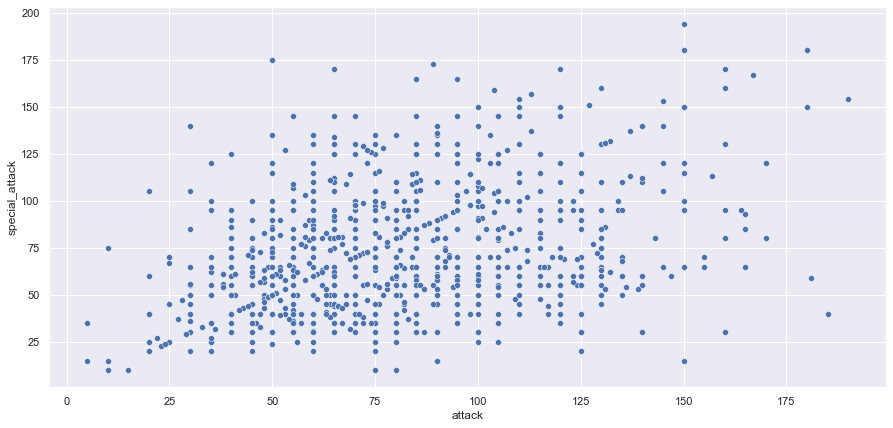

In [14]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x=data['attack'],y = data['special_attack'])

From the scatter plot, we can see that the data are spreaded out pretty evenly. However, we can see some linear trend at the middle of the graph which is very interesting.

<AxesSubplot:xlabel='defense', ylabel='special_defense'>

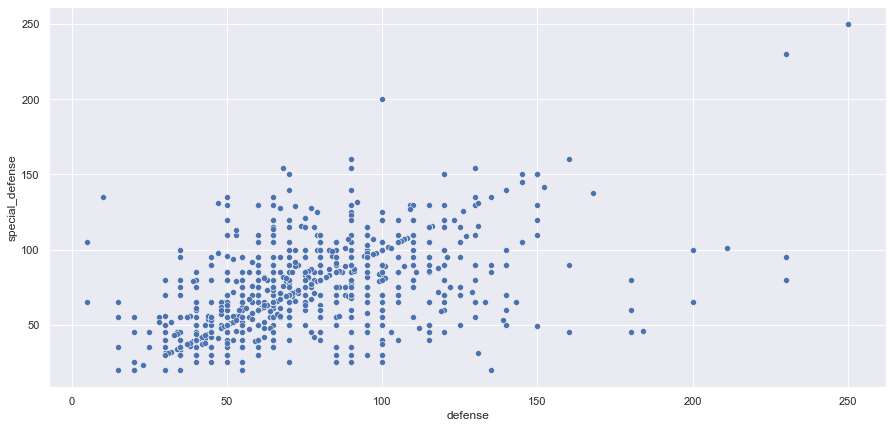

In [15]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x=data['defense'],y = data['special_defense'])

The relationship of defense and special defense also see a similar trend like the relationship between attack and special attack.

In [16]:
special = ['water','grass','fire','dark','ice','electric','psychic','dragon']
physical = ['normal','fighting','fly','ground','rock','bug','ghost','poison','steel']

In [17]:
# Find the best type for the attack pokemon to use against the defense 
def best_attack_type(att_poke,att_type,def_poke):
    best_effect = 0 
    for att in att_type:
        if att == "flying":
            att = "fly"
        if effect[att + "_attack_effectiveness"].iloc[def_poke] > best_effect:
            best_effect = effect[att + "_attack_effectiveness"].iloc[def_poke]
    return best_effect
# Find if that pokemon use special move or physical move        
def spec_phy(poke1,poke2,types,spec,phy):
    if set(types).issubset(spec):
        return stats['special_attack'].iloc[poke1],stats["special_defense"].iloc[poke2]
    elif set(types).issubset(phy):
        return stats['attack'][poke1],stats["defense"].iloc[poke2]
    elif stats['special_attack'][poke1] > stats['attack'][poke1]:
        return  stats['special_attack'][poke1],stats["special_defense"].iloc[poke2]
    else:
        return stats['attack'][poke1],stats["defense"].iloc[poke2]
# Calculate Damage formula        
def damage(att_val, def_val, type_eff):
    return (0.5*att_val/def_val*type_eff) + 1
# Let two pokemon battle each other
def battling(poke1,poke2,special,physical):
    poketype1,poketype2 = stats['typing'].str.lower()[poke1].split("~"), stats['typing'].str.lower()[poke2].split("~")
    poke1_att_val, poke2_def_val = spec_phy(poke1,poke2, poketype1,special,physical)
    poke2_att_val, poke1_def_val = spec_phy(poke2,poke1, poketype2,special,physical)
    best_type_poke1, best_type_poke2 = best_attack_type(poke1,poketype1,poke2),best_attack_type(poke2,poketype2,poke1)
    hp_poke1, hp_poke2 = stats['hp'].iloc[poke1], stats['hp'].iloc[poke2]
    speed_poke1, speed_poke2 = stats['speed'].iloc[poke1], stats['speed'].iloc[poke2]
    while True:
        if speed_poke1 > speed_poke2:
            hp_poke2 = hp_poke2 - damage(poke1_att_val,poke2_def_val,best_type_poke1)
            if hp_poke2 <= 0:
                return poke1
            hp_poke1 = hp_poke1 - damage(poke2_att_val,poke1_def_val,best_type_poke2)
            if hp_poke1 <= 0:
                return poke2
        elif speed_poke1 < speed_poke2:
            hp_poke1 = hp_poke1 - damage(poke2_att_val,poke1_def_val,best_type_poke2)
            if hp_poke1 <= 0:
                return poke2
            hp_poke2 = hp_poke2 - damage(poke1_att_val,poke2_def_val,best_type_poke1)
            if hp_poke2 <= 0:
                return poke1

In [18]:
wins = np.zeros(10, dtype = int)
for poke1 in range(9):
    for poke2 in range(poke1,10):
        if poke1 != poke2:
            winner = battling(poke1,poke2,special,physical)
            wins[winner] = wins[winner] + 1

<AxesSubplot:xlabel='name'>

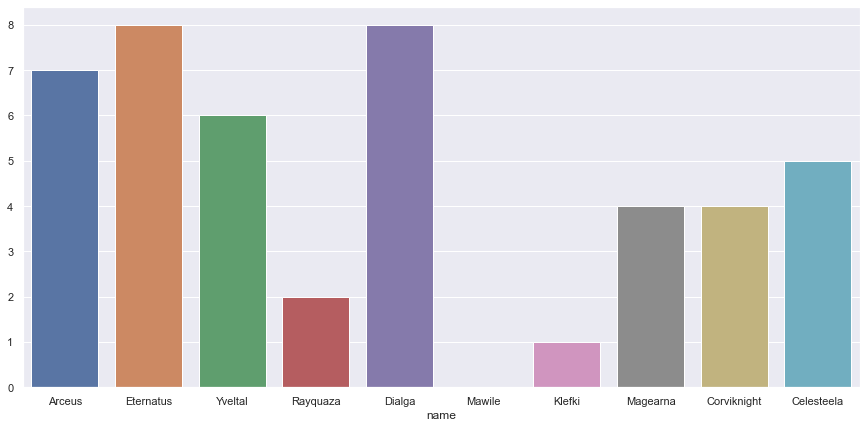

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x = ten_pokemon['name'], y = wins)

We can see that Eternatus and Dialga are the two pokemons that has the most wins (8 wins). Therefore, we have to have another the match to decide the strongest pokemon of all.

In [20]:
strongest_pokemon = battling(1,4,special,physical)
ten_pokemon['name'][strongest_pokemon]

'Dialga'

### 4.2.2 Conclusion  
In the end, Dialga ,a legendary pokemon, is the strongest pokemon according to the dataset we have. However, this conclusion is only base on the information we have from the dataset and there are a lot of other aspects can affect this result. 

# 5. Reflection

## What difficulties have you encountered ?  
_ Dương Minh Khôi: Because the information of pokemons' stats are still lacking some attributes so the Damage formula is not entirely correct.
## What have you learned ? 
_ Dương Minh Khôi: A great question is a question that involves a great number attributes in the dataset when analyzing.
## If you have more time, what would you do ? 
_ Search another dataset that can fulfill all the missing attributes in the Damage formula, find a way to implement Battle stage more game-like in order to get the best results.

# 6. References

https://bulbapedia.bulbagarden.net/